<a href="https://colab.research.google.com/github/endzix22/machine-learning-bootcamp/blob/main/Kopia_notatnika_machine_learning_databases_echocardiogram_echocardiogram_dataSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install plotly==5.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
!pip install chart_studio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=22596e13f655a0e2863b6e590468d41a40e8504d23d34361de95e8606d213126
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np
import random 

import plotly.express as px 
np.random.seed(42)
sns.set(font_scale=1.3)

In [4]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data', error_bad_lines=False,
                   names = ['Survival', 'Still_alive', 'Age_at_heart_attack', 'Pericardial_effusion', 'Fractional_shortening',
                            'Epss', 'Lvdd', 'Wall_motion_score', 'Wall_motion_index', 'Mult', 'Name', 'Group', 'Alive_at_1'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.head()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [6]:

data.tail()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
127,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
128,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
129,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
130,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?
131,20,0,62,0,0.15,0,4.51,15.5,1.409,0.786,name,?,?


1. Wstępne przygotowanie danych

In [7]:

dataCopy=data.copy()

In [8]:
dataCopy.shape

(132, 13)

In [9]:
dataCopy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Survival               131 non-null    object
 1   Still_alive            132 non-null    object
 2   Age_at_heart_attack    132 non-null    object
 3   Pericardial_effusion   132 non-null    int64 
 4   Fractional_shortening  132 non-null    object
 5   Epss                   132 non-null    object
 6   Lvdd                   132 non-null    object
 7   Wall_motion_score      132 non-null    object
 8   Wall_motion_index      132 non-null    object
 9   Mult                   132 non-null    object
 10  Name                   132 non-null    object
 11  Group                  132 non-null    object
 12  Alive_at_1             132 non-null    object
dtypes: int64(1), object(12)
memory usage: 93.5 KB


0-Survival, liczba miesiecy które pacjent przezyl

1-Still Alive (0-nie żyje,1-nadal żyje)

12-Alive at 1- wartosc logiczna uzyskana z dwoch pierwszych kolumn. 
(0-pacjent zmarl przed 1 rokiem,lub był obserwowany krócej niż rok
1-pacjent żył po 1 roku)

In [10]:
dataCopy[dataCopy.isna().any(axis=1)]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
49,NaN,?,?,77,?,?,?,?,?,2,?,name,2


In [11]:
dataCopy.dropna(inplace=True)
#zdecydowalysmy sie na usuniecie całego wiersza, bo wystepowaly nam prawie same znaki zapytania

In [12]:
len(dataCopy)

131

0-Survival była zmieniana ze względu na kolumnę 1 i ostatnią



In [13]:
dataCopy['Survival'].value_counts()

0.5     6
1       6
33      5
26      5
0.75    5
27      4
12      4
36      4
29      4
19      4
22      4
25      4
34      3
24      3
10      3
41      3
16      3
31      3
32      3
49      2
38      2
53      2
21      2
.25     2
20      2
37      2
2       2
15      2
52      2
35      2
17      2
13      2
28      2
0.25    2
40      2
5       2
23      1
4       1
3       1
1.25    1
55      1
.03     1
?       1
.75     1
11      1
47      1
9       1
45      1
7       1
19.5    1
46      1
03      1
48      1
44      1
50      1
57      1
7.5     1
Name: Survival, dtype: int64

In [14]:
dataCopy.loc[dataCopy['Survival'] == ".25"]


,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
70,.25,1,86,0,0.225,12.2,5.20,24,2.18,0.786,name,2,1
76,.25,1,68,0,0.22,21.7,4.85,15,1.15,0.928,name,2,?


In [15]:
dataCopy['Survival'].replace(to_replace=['.25'],value='25',inplace=True)


In [16]:
dataCopy.loc[dataCopy['Survival'] == ".03"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
77,.03,1,?,0,0.26,19.4,4.77,21,2.1,0.714,name,2,1


In [17]:
dataCopy['Survival'].replace(to_replace=['.03'],value='30',inplace=True)

In [18]:
dataCopy.loc[dataCopy['Survival'] == "?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
94,?,1,61,0,0.20,9.4,4.02,15.67,1.42,0.786,name,2,1


In [19]:
dataCopy['Survival'].replace(to_replace=['?'],value='28',inplace=True)

In [20]:
dataCopy.loc[dataCopy['Survival'] == ".75"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
108,.75,1,78,0,0.23,40,6.23,14,1.4,0.714,name,2,1


In [21]:
dataCopy['Survival'].replace(to_replace=['.75'],value='75',inplace=True)

In [22]:
dataCopy.loc[dataCopy['Survival'] == "0.5"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
14,0.5,1,62,0,0.120,23,5.800,11.67,2.330,0.358,name,1,1
16,0.5,1,69,1,0.260,11,4.650,18,1.640,0.784,name,1,1
17,0.5,1,62.529,1,0.070,20,5.200,24,2,0.857,name,1,1
22,0.5,1,73,0,0.230,12.733,6.060,7.5,1.500,0.360,name,1,1
63,0.5,1,59,0,0.13,16.4,4.96,17.83,1.37,0.928,name,2,?
90,0.5,1,67,0,0.155,11.3,5.16,13,1,0.928,name,2,?


In [23]:
dataCopy['Survival'].replace(to_replace=['0.5'],value='50',inplace=True)

In [24]:
dataCopy.loc[dataCopy['Survival'] == "0.75"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
20,0.75,1,69,0,0.150,12,5.390,19.5,1.625,0.857,name,1,1
21,0.75,1,85,1,0.180,19,5.460,13.83,1.380,0.710,name,1,1
66,0.75,1,50,0,0.14,11.4,4.75,10,2.5,0.28,name,2,?
83,0.75,1,78,0,0.05,10,4.44,15,1.36,0.786,name,2,1
84,0.75,1,61,0,?,?,?,28,2.33,0.857,name,2,1


In [25]:
dataCopy['Survival'].replace(to_replace=['0.75'],value='75',inplace=True)

In [26]:
dataCopy.loc[dataCopy['Survival'] == "0.25"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
28,0.25,1,75,0,?,?,?,?,1,?,name,2,?
48,0.25,1,63,1,?,?,?,23,2.300,0.714,name,2,1


In [27]:
dataCopy['Survival'].replace(to_replace=['0.25'],value='25',inplace=True)

In [28]:
dataCopy.loc[dataCopy['Survival'] == "1.25"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
104,1.25,1,63,0,0.30,6.9,3.52,18.16,1.51,0.857,name,2,1


In [29]:
dataCopy['Survival'].replace(to_replace=['1.25'],value='12.5',inplace=True)

In [30]:
dataCopy.loc[dataCopy['Survival'] == "03"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Name,Group,Alive_at_1
32,03,1,?,0,?,12,?,6,3,0.140,name,2,?


In [31]:
dataCopy['Survival'].replace(to_replace=['03'],value='3',inplace=True)

In [32]:
dataCopy['Survival']=dataCopy['Survival'].astype('float64')

In [33]:
dataCopy['Survival'].mean()

28.96564885496183

1. STILL_ALIVE

In [34]:
dataCopy['Still_alive'].value_counts()

0    88
1    43
Name: Still_alive, dtype: int64

In [35]:
dataCopy['Still_alive']=dataCopy['Still_alive'].astype(int)

Naszym targetem jest "Alive at 1",
żywy na poziomie 1 — wartość logiczna. Pochodzi z dwóch pierwszych atrybutów.

0 oznacza, że ​​pacjent zmarł po 1 roku lub był obserwowany krócej niż 1 rok. 

1 oznacza, że ​​pacjent żył po 1 roku.

In [36]:
dataCopy.drop(columns='Name',inplace=True)

In [37]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               131 non-null    float64
 1   Still_alive            131 non-null    int64  
 2   Age_at_heart_attack    131 non-null    object 
 3   Pericardial_effusion   131 non-null    int64  
 4   Fractional_shortening  131 non-null    object 
 5   Epss                   131 non-null    object 
 6   Lvdd                   131 non-null    object 
 7   Wall_motion_score      131 non-null    object 
 8   Wall_motion_index      131 non-null    object 
 9   Mult                   131 non-null    object 
 10  Group                  131 non-null    object 
 11  Alive_at_1             131 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 13.3+ KB


In [38]:
dataCopy['Age_at_heart_attack'].value_counts()

62        10
57         8
61         8
63         7
59         7
64         7
60         6
54         6
55         5
70         5
?          5
65         5
66         5
68         4
73         4
56         3
69         3
67         3
78         3
58         2
79         2
50         2
71         2
52         2
72         2
46         2
80         1
47         1
75         1
35         1
81         1
85         1
62.529     1
51         1
77         1
86         1
74         1
53         1
48         1
Name: Age_at_heart_attack, dtype: int64

In [39]:
dataCopy.loc[dataCopy['Age_at_heart_attack']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Group,Alive_at_1
32,3.0,1,?,0,?,12,?,6,3,0.140,2,?
77,30.0,1,?,0,0.26,19.4,4.77,21,2.1,0.714,2,1
116,37.0,0,?,0,0.26,0,4.38,9,1,0.64,?,?
119,28.0,0,?,0,0.23,19.1,5.49,12,1.20,0.71,?,?
125,17.0,0,?,0,0.09,6.80,4.96,13,1.08,0.857,?,?


JAK ZAMIENIĆ ZE STRINGÓW (OBJECT) NA FLOAT

In [40]:
dataCopy['Age_at_heart_attack'] = pd.to_numeric(dataCopy['Age_at_heart_attack'], errors='coerce').astype('float64')

In [41]:
print(dataCopy.loc[32])

Survival                   3.0
Still_alive                  1
Age_at_heart_attack        NaN
Pericardial_effusion         0
Fractional_shortening        ?
Epss                        12
Lvdd                         ?
Wall_motion_score            6
Wall_motion_index            3
Mult                     0.140
Group                        2
Alive_at_1                   ?
Name: 32, dtype: object


In [42]:
k=dataCopy['Age_at_heart_attack'].mean()

In [43]:
dataCopy['Age_at_heart_attack'] = dataCopy['Age_at_heart_attack'].fillna(dataCopy['Age_at_heart_attack'].mean())

In [44]:
print(dataCopy.loc[32])

Survival                       3.0
Still_alive                      1
Age_at_heart_attack      62.813722
Pericardial_effusion             0
Fractional_shortening            ?
Epss                            12
Lvdd                             ?
Wall_motion_score                6
Wall_motion_index                3
Mult                         0.140
Group                            2
Alive_at_1                       ?
Name: 32, dtype: object


Teraz czas na Pericardial_effusion

"wysięk osierdziowy – binarny. Wysięk osierdziowy to płyn wokół serca. 0=brak płynu, 1=płyn"

In [45]:
dataCopy['Pericardial_effusion'].value_counts()

0    107
1     24
Name: Pericardial_effusion, dtype: int64

In [46]:
dataCopy['Pericardial_effusion']=dataCopy['Pericardial_effusion'].astype(int)

Teraz czas na Fractional_shortening

skrócenie ułamkowe – miara kurczliwości wokół serca niższe liczby są coraz bardziej nieprawidłowe

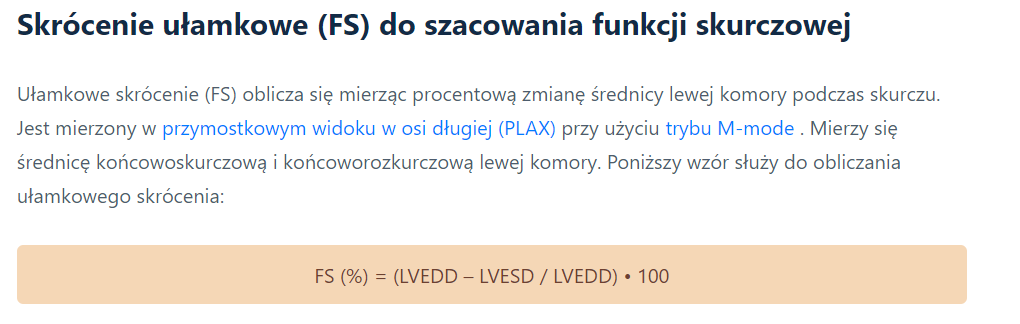

In [47]:
dataCopy['Fractional_shortening'].value_counts()

?        7
0.20     6
0.260    4
0.150    4
0.17     4
        ..
0.11     1
0.180    1
0.220    1
0.36     1
0.09     1
Name: Fractional_shortening, Length: 73, dtype: int64

In [48]:
dataCopy.loc[dataCopy['Fractional_shortening']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Group,Alive_at_1
27,29.0,0,55.000000,0,?,7,?,2,1,2,2,?
28,25.0,1,75.000000,0,?,?,?,?,1,?,2,?
32,3.0,1,62.813722,0,?,12,?,6,3,0.140,2,?
34,35.0,0,63.000000,0,?,10,?,14,1.170,0.857,2,0
36,16.0,0,63.000000,1,?,?,5.310,5,1,0.357,2,0
48,25.0,1,63.000000,1,?,?,?,23,2.300,0.714,2,1
84,75.0,1,61.000000,0,?,?,?,28,2.33,0.857,2,1


In [49]:
dataCopy.drop(index=28,inplace=True)

In [50]:
dataCopy.loc[dataCopy['Fractional_shortening']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Group,Alive_at_1
27,29.0,0,55.000000,0,?,7,?,2,1,2,2,?
32,3.0,1,62.813722,0,?,12,?,6,3,0.140,2,?
34,35.0,0,63.000000,0,?,10,?,14,1.170,0.857,2,0
36,16.0,0,63.000000,1,?,?,5.310,5,1,0.357,2,0
48,25.0,1,63.000000,1,?,?,?,23,2.300,0.714,2,1
84,75.0,1,61.000000,0,?,?,?,28,2.33,0.857,2,1


In [51]:

dataCopy['Fractional_shortening'] = pd.to_numeric(dataCopy['Fractional_shortening'], errors='coerce').astype('float64')

In [52]:
dataCopy['Fractional_shortening'].mean()

0.21673387096774194

In [53]:
dataCopy['Fractional_shortening'] = dataCopy['Fractional_shortening'].fillna(dataCopy['Fractional_shortening'].mean())

In [54]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still_alive            130 non-null    int64  
 2   Age_at_heart_attack    130 non-null    float64
 3   Pericardial_effusion   130 non-null    int64  
 4   Fractional_shortening  130 non-null    float64
 5   Epss                   130 non-null    object 
 6   Lvdd                   130 non-null    object 
 7   Wall_motion_score      130 non-null    object 
 8   Wall_motion_index      130 non-null    object 
 9   Mult                   130 non-null    object 
 10  Group                  130 non-null    object 
 11  Alive_at_1             130 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 13.2+ KB


image.png

zrodło: https://archive.ics.uci.edu/ml/datasets/echocardiogram

In [55]:
dataCopy['Mult'].value_counts()

0.857    29
0.786    19
0.714    16
1        13
0.928     7
0.785     5
0.640     4
0.643     3
0.64      3
0.57      2
0.428     2
?         2
0.357     2
0.71      2
0.570     2
0.571     2
1.003     2
0.710     2
0.812     1
0.788     1
0.28      1
0.930     1
0.642     1
0.358     1
0.588     1
0.784     1
0.429     1
0.360     1
0.140     1
2         1
0.430     1
Name: Mult, dtype: int64

In [56]:
dataCopy['Mult'] = pd.to_numeric(dataCopy['Mult'], errors='coerce').astype('float64')

In [57]:
dataCopy.sort_values(by='Mult',ascending=True,inplace=True)

In [58]:
dataCopy['Mult'].fillna(method='ffill', inplace=True)

image.png

zrodło: https://archive.ics.uci.edu/ml/datasets/echocardiogram

In [59]:
dataCopy.drop(columns='Group',inplace=True)

In [60]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 32 to 50
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still_alive            130 non-null    int64  
 2   Age_at_heart_attack    130 non-null    float64
 3   Pericardial_effusion   130 non-null    int64  
 4   Fractional_shortening  130 non-null    float64
 5   Epss                   130 non-null    object 
 6   Lvdd                   130 non-null    object 
 7   Wall_motion_score      130 non-null    object 
 8   Wall_motion_index      130 non-null    object 
 9   Mult                   130 non-null    float64
 10  Alive_at_1             130 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 12.2+ KB


5-EPSS


In [61]:
dataCopy['Epss'].value_counts()

?       13
0        7
12       4
10       3
9        3
        ..
9.30     1
13.6     1
40       1
25       1
14       1
Name: Epss, Length: 92, dtype: int64

In [62]:
dataCopy.loc[dataCopy['Epss']=="?"]
#im większy, tym gorzej

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Alive_at_1
36,16.0,0,63.0,1,0.216734,?,5.310,5,1,0.357,0
51,7.0,1,61.0,1,0.270000,?,?,9,1.500,0.428,1
45,37.0,0,64.0,0,0.090000,?,?,12,2,0.428,?
46,19.5,1,81.0,0,0.120000,?,?,9,1.250,0.570,0
38,19.0,0,68.0,0,0.510000,?,3.880,15,1.670,0.640,0
100,31.0,0,53.0,0,0.170000,?,4.69,10,1,0.710,?
30,1.0,1,65.0,0,0.150000,?,5.050,10,1,0.710,?
48,25.0,1,63.0,1,0.216734,?,?,23,2.300,0.714,1
101,33.0,0,66.0,0,0.200000,?,4.23,12,1,0.857,0
61,9.0,0,73.0,0,0.120000,?,6.78,16.67,1.39,0.857,?


In [63]:
#dataCopy['Epss'].mean()

In [64]:
dataCopy.sort_values(by='Epss',ascending=True,inplace=True)

In [65]:
dataCopy.loc[dataCopy['Epss']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Alive_at_1
48,25.0,1,63.0,1,0.216734,?,?,23,2.300,0.714,1
38,19.0,0,68.0,0,0.510000,?,3.880,15,1.670,0.640,0
36,16.0,0,63.0,1,0.216734,?,5.310,5,1,0.357,0
59,38.0,0,68.0,0,0.290000,?,4.41,14,1.167,0.857,?
45,37.0,0,64.0,0,0.090000,?,?,12,2,0.428,?
43,46.0,0,56.0,0,0.330000,?,3.590,14,1,1.000,0
46,19.5,1,81.0,0,0.120000,?,?,9,1.250,0.570,0
100,31.0,0,53.0,0,0.170000,?,4.69,10,1,0.710,?
61,9.0,0,73.0,0,0.120000,?,6.78,16.67,1.39,0.857,?
51,7.0,1,61.0,1,0.270000,?,?,9,1.500,0.428,1


In [66]:
print(dataCopy.loc[36])

Survival                     16.0
Still_alive                     0
Age_at_heart_attack          63.0
Pericardial_effusion            1
Fractional_shortening    0.216734
Epss                            ?
Lvdd                        5.310
Wall_motion_score               5
Wall_motion_index               1
Mult                        0.357
Alive_at_1                      0
Name: 36, dtype: object


In [67]:
dataCopy['Epss'] = pd.to_numeric(dataCopy['Epss'], errors='coerce').astype('float64')

In [68]:
dataCopy['Epss'].replace('?',value=np.NaN,inplace=True)

In [69]:
dataCopy.loc[dataCopy['Epss']==np.NaN]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Alive_at_1


In [70]:
dataCopy['Epss'].fillna(method='ffill', inplace=True)



 6   Lvdd 

lvdd -- wymiar końcoworozkurczowy lewej komory. Jest to miara wielkości serca pod koniec rozkurczu. Duże serca bywają chorymi sercami.


In [71]:
dataCopy['Lvdd'].value_counts()

?        9
4.48     3
4.77     2
5.36     2
5.47     2
        ..
5.62     1
4.230    1
6.150    1
5.400    1
4.23     1
Name: Lvdd, Length: 106, dtype: int64

In [72]:
dataCopy.loc[dataCopy['Lvdd']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_score,Wall_motion_index,Mult,Alive_at_1
34,35.0,0,63.000000,0,0.216734,10.0,?,14,1.170,0.857,0
32,3.0,1,62.813722,0,0.216734,12.0,?,6,3,0.140,?
37,1.0,1,65.000000,0,0.060000,23.6,?,21.500,2.150,0.714,1
27,29.0,0,55.000000,0,0.216734,7.0,?,2,1,2.000,?
48,25.0,1,63.000000,1,0.216734,9.8,?,23,2.300,0.714,1
45,37.0,0,64.000000,0,0.090000,9.8,?,12,2,0.428,?
46,19.5,1,81.000000,0,0.120000,9.8,?,9,1.250,0.570,0
51,7.0,1,61.000000,1,0.270000,9.8,?,9,1.500,0.428,1
84,75.0,1,61.000000,0,0.216734,9.8,?,28,2.33,0.857,1


In [73]:
dataCopy['Lvdd'] = pd.to_numeric(dataCopy['Lvdd'], errors='coerce').astype('float64')

In [74]:
dataCopy['Lvdd'].median()

4.65

In [75]:
dataCopy['Lvdd'] = dataCopy['Lvdd'].fillna(dataCopy['Epss'].median())

In [76]:
dataCopy['Wall_motion_score'] = pd.to_numeric(dataCopy['Wall_motion_score'], errors='coerce').astype('float64')


In [77]:
dataCopy['Wall_motion_index'] = pd.to_numeric(dataCopy['Wall_motion_index'], errors='coerce').astype('float64')

 7   Wall_motion_score

 wall-motion-score – miara ruchu segmentów lewej komory

8 wall-motion-index – równa się wall-motion-score podzielona przez liczbę widocznych segmentów. Zwykle na echokardiogramie widocznych jest 12-13 segmentów. Użyj tej zmiennej ZAMIAST oceny ruchu ściany.

Wall_motion_index	
i 

Wall_motion_score

zdecydowałyśmy się na usunięcie kolumny wall_motion_score, więc trzeba udowodnić korelację pomiędzy tymi dwoma kolumna:

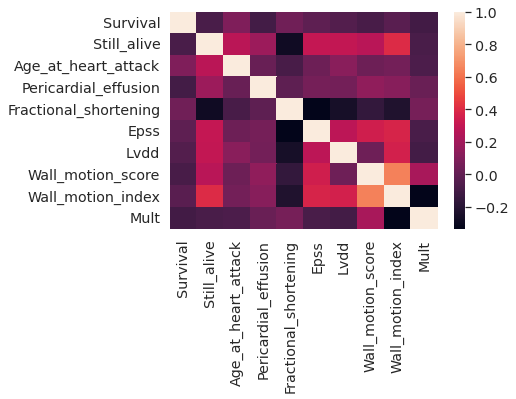

In [78]:
sns.heatmap(dataCopy.corr())

In [79]:
dataCopy.drop(columns='Wall_motion_score',inplace=True)

In [80]:
dataCopy['Wall_motion_index'].value_counts()

1.000    41
1.500     6
1.270     3
2.000     3
1.080     3
1.450     3
2.330     2
1.150     2
1.040     2
1.140     2
1.100     2
1.370     2
2.250     2
1.380     2
1.950     2
2.300     2
1.625     2
3.000     2
1.180     2
1.375     2
1.360     2
1.170     2
1.670     2
1.167     1
1.250     1
2.390     1
1.875     1
1.560     1
1.222     1
1.400     1
1.210     1
1.830     1
1.420     1
1.110     1
1.700     1
1.510     1
2.010     1
1.667     1
1.230     1
1.200     1
2.150     1
2.200     1
1.409     1
1.640     1
2.500     1
1.050     1
2.180     1
1.190     1
1.730     1
1.410     1
1.090     1
1.800     1
1.367     1
1.060     1
1.333     1
1.300     1
2.100     1
1.310     1
1.390     1
Name: Wall_motion_index, dtype: int64

In [81]:
dataCopy.loc[dataCopy['Wall_motion_index']=="?"]

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_index,Mult,Alive_at_1


In [82]:
dataCopy['Wall_motion_index'].replace(to_replace=['?'],value='1',inplace=True)

In [83]:
dataCopy['Wall_motion_index']=dataCopy['Wall_motion_index'].astype('float64')

13. żywy na poziomie 1 — wartość logiczna. Pochodzi z dwóch pierwszych atrybutów. 0 oznacza, że ​​pacjent zmarł po 1 roku lub był obserwowany krócej niż 1 rok. 1 oznacza, że ​​pacjent żył po 1 roku.

survival powyzej 12 miesiecy i still alive true to zastap '?' jedynka

In [84]:
dataCopy['Alive_at_1'].value_counts()

?    56
0    50
1    24
Name: Alive_at_1, dtype: int64

In [85]:
dataCopy.shape

(130, 10)

In [86]:

for i in range(len(dataCopy)):
  if [(dataCopy['Still_alive']==True)&(dataCopy['Survival']>12.0)]:
    dataCopy['Alive_at_1'].replace(to_replace=['?'],value='1',inplace=True)
  else:
    dataCopy['Alive_at_1'].replace(to_replace=['?'],value='0',inplace=True)



In [87]:
dataCopy['Alive_at_1'].value_counts()

1    80
0    50
Name: Alive_at_1, dtype: int64

In [88]:
dataCopy['Alive_at_1']=dataCopy['Alive_at_1'].astype(int)

In [89]:
dataCopy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 102 to 101
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still_alive            130 non-null    int64  
 2   Age_at_heart_attack    130 non-null    float64
 3   Pericardial_effusion   130 non-null    int64  
 4   Fractional_shortening  130 non-null    float64
 5   Epss                   130 non-null    float64
 6   Lvdd                   130 non-null    float64
 7   Wall_motion_index      129 non-null    float64
 8   Mult                   130 non-null    float64
 9   Alive_at_1             130 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 15.2 KB


In [90]:
dataCopy.describe().T

,count,mean,std,min,25%,50%,75%,max
Survival,130.0,28.996154,17.514058,1.00,17.000,27.000000,37.7500,75.00
Still_alive,130.0,0.323077,0.469461,0.00,0.000,0.000000,1.0000,1.00
Age_at_heart_attack,130.0,62.719982,8.140816,35.00,57.250,62.000000,67.0000,86.00
Pericardial_effusion,130.0,0.184615,0.389486,0.00,0.000,0.000000,0.0000,1.00
Fractional_shortening,130.0,0.216734,0.104983,0.01,0.150,0.216734,0.2675,0.61
Epss,130.0,11.928292,7.025127,0.00,7.525,9.800000,14.9500,40.00
Lvdd,130.0,5.111862,1.502595,2.32,4.290,4.735000,5.4225,9.80
Wall_motion_index,129.0,1.380930,0.452370,1.00,1.000,1.222000,1.5100,3.00
Mult,130.0,0.795538,0.248719,0.14,0.714,0.786000,0.8570,2.00
Alive_at_1,130.0,0.615385,0.488386,0.00,0.000,1.000000,1.0000,1.00


In [91]:
cols = ['Survival','Age_at_heart_attack','Fractional_shortening','Epss','Lvdd','Wall_motion_index','Mult'] # one or more

Q1 = dataCopy[cols].quantile(0.25)
Q3 = dataCopy[cols].quantile(0.75)
IQR = Q3 - Q1

dataCopy = dataCopy[~((dataCopy[cols] < (Q1 - 1.5 * IQR)) |(dataCopy[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [92]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

dataCopy[['Survival','Age_at_heart_attack','Fractional_shortening','Epss','Lvdd','Wall_motion_index','Mult']]=scaler.fit_transform(dataCopy[['Survival','Age_at_heart_attack','Fractional_shortening','Epss','Lvdd','Wall_motion_index','Mult']])
dataCopy.head()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_index,Mult,Alive_at_1
102,-0.347332,0,1.107937,0,1.820053,-1.895403,-0.187068,-0.778624,-0.789089,0
116,0.705869,0,0.094111,0,0.477332,-1.895403,-0.428280,-0.778624,-1.421889,1
8,-0.557973,0,-2.277935,0,1.372479,-1.895403,0.579136,-0.338474,1.682250,0
131,-0.487759,0,-0.020687,0,-0.753495,-1.895403,-0.243824,0.507243,-0.173392,1
23,-1.540960,1,1.249015,0,-0.529708,-1.895403,-0.045178,-0.778624,-2.020483,1


In [93]:
#szmery bajery z wykresami +
#+wstepna analiza +-
#next walidacja krzyzowa
#wybrac ze dwie metody (np. knn i drzewa losowe)
#na koniec PCA 
#porownac z jakimis zrodlami to co robimy +jak to sie ma do rzeczywistosci

In [94]:
dataCopy.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 102 to 101
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               94 non-null     float64
 1   Still_alive            94 non-null     int64  
 2   Age_at_heart_attack    94 non-null     float64
 3   Pericardial_effusion   94 non-null     int64  
 4   Fractional_shortening  94 non-null     float64
 5   Epss                   94 non-null     float64
 6   Lvdd                   94 non-null     float64
 7   Wall_motion_index      94 non-null     float64
 8   Mult                   94 non-null     float64
 9   Alive_at_1             94 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 8.1 KB


In [95]:
### II CZESC


I czesc pracy z danymi została zakonczona na etapie 

1.zastapienia kolumn tekstowych, kolumnami numerycznymi 
2. udalo nam sie usunac wartosci 'NaN'
3.Usunelysmy wartosci odstajace 
4. Dokonalysmy standaryzacji danych 

In [96]:
##szmery bajery z wyresami 


In [97]:
px.parallel_coordinates(dataCopy)


Jedna taka linia to jeden wiersz naszego DF 

widać mmniej więcej jak te cechy się ukłądają

In [98]:
dataCopy.corr()

,Survival,Still_alive,Age_at_heart_attack,Pericardial_effusion,Fractional_shortening,Epss,Lvdd,Wall_motion_index,Mult,Alive_at_1
Survival,1.000000,-0.300201,-0.108471,-0.199848,0.107288,-0.041716,-0.076289,-0.128044,-0.047226,-0.243424
Still_alive,-0.300201,1.000000,0.226819,0.248449,-0.189347,0.233143,0.112979,0.285046,0.063830,0.339704
Age_at_heart_attack,-0.108471,0.226819,1.000000,0.010438,-0.132772,-0.048910,0.122852,0.125235,-0.105245,0.017805
Pericardial_effusion,-0.199848,0.248449,0.010438,1.000000,-0.020986,0.098083,0.079887,0.308392,0.052925,0.118299
Fractional_shortening,0.107288,-0.189347,-0.132772,-0.020986,1.000000,-0.424772,-0.287676,-0.164970,0.120232,-0.124082
Epss,-0.041716,0.233143,-0.048910,0.098083,-0.424772,1.000000,0.442370,0.243103,0.031297,0.063807
Lvdd,-0.076289,0.112979,0.122852,0.079887,-0.287676,0.442370,1.000000,0.072991,-0.041135,0.094661
Wall_motion_index,-0.128044,0.285046,0.125235,0.308392,-0.164970,0.243103,0.072991,1.000000,-0.269909,0.063411
Mult,-0.047226,0.063830,-0.105245,0.052925,0.120232,0.031297,-0.041135,-0.269909,1.000000,-0.192264
Alive_at_1,-0.243424,0.339704,0.017805,0.118299,-0.124082,0.063807,0.094661,0.063411,-0.192264,1.000000


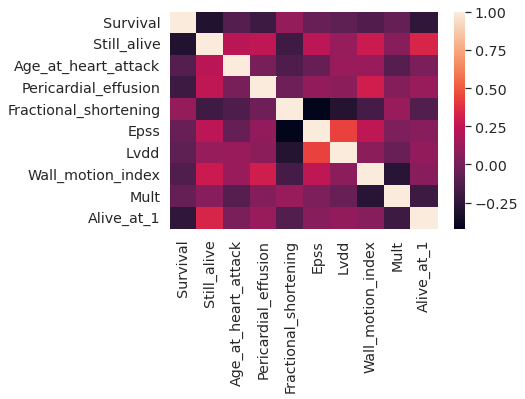

In [99]:
#wyswietlenie korelacji pomiedzy zmiennymi 
sns.heatmap(dataCopy.corr())


In [100]:
px.parallel_categories(dataCopy,color='Alive_at_1')

In [101]:

A_1_1=dataCopy.loc[(dataCopy.Alive_at_1 == 1)]
A_1_0=dataCopy.loc[(dataCopy.Alive_at_1 == 0)]

In [102]:
px.parallel_categories(A_1_1)

In [103]:
px.parallel_categories(A_1_0)

1    54
0    40
Name: Alive_at_1, dtype: int64


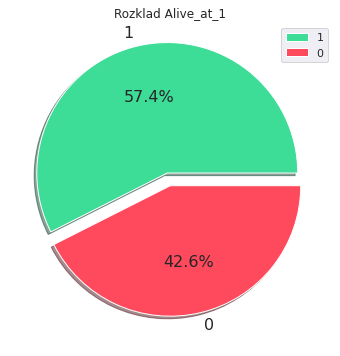

In [104]:
#rozklad targetu tzn "Alive_at_1"

plt.figure(figsize=[8,6])
sns.set() #ustawmy sobie styl z biblio seaborn
dataCopy.Alive_at_1.value_counts().plot(kind='pie',fontsize=16,colors=['#3DDC97','#FF495C'],
                             explode=[0.1,0],shadow=True,
                             autopct='%1.1f%%')

#wyswietlenie legendy na wykresie
plt.legend()
#pozbycie sie labela z boku 'Alive_at_1'
plt.ylabel('')
plt.title('Rozklad Alive_at_1')
print(dataCopy.Alive_at_1.value_counts())

In [105]:
#macierz rozrzutu zmiennych
#na przekatnej znajduja sie histogramy 
#po prawej legenda

#sns.pairplot(data=dataCopy,vars=['Survival','Still_alive','Age_at_heart_attack','Pericardial_effusion','Fractional_shortening','Epss','Lvdd','Wall_motion_index','Mult'],hue='Alive_at_1',palette=['#3DDC97','#FF495C'])
#na przekatnej histogramy

In [106]:
dataCopy.info(memory_usage='deep')
#jeszcze raz zerknijmy na nasze dane

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 102 to 101
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               94 non-null     float64
 1   Still_alive            94 non-null     int64  
 2   Age_at_heart_attack    94 non-null     float64
 3   Pericardial_effusion   94 non-null     int64  
 4   Fractional_shortening  94 non-null     float64
 5   Epss                   94 non-null     float64
 6   Lvdd                   94 non-null     float64
 7   Wall_motion_index      94 non-null     float64
 8   Mult                   94 non-null     float64
 9   Alive_at_1             94 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 8.1 KB


In [107]:
#teraz zajmijmy się podziałem danych na zbiór treningowy i testowy
#zrobimy to w sposob "ksiazkowy" w proporcjach:
#70% zbior treningowy 
#30% zbior testowy


In [108]:
#walidacja na zbiorze treningowym


In [109]:
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')
"""

"\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)\n\nprint(f'X_train shape {X_train.shape}')\nprint(f'y_train shape {y_train.shape}')\nprint(f'X_test shape {X_test.shape}')\nprint(f'y_test shape {y_test.shape}')\nprint(f'\nTest ratio: {len(X_test) / len(data):.2f}')\nprint(f'\ny_train:\n{y_train.value_counts()}')\nprint(f'\ny_test:\n{y_test.value_counts()}')\n"